# Portfolio optimization with Sharpe Ratio and Monte Carlo simulation 

Portfolio optimization is a key part of investment management that aims to maximize returns while minimizing risk. By carefully choosing where to put their money, investors can create a well-balanced portfolio that fits their risk level and financial goals. This helps in allocating capital more efficiently, reducing unnecessary risks, and improving long-term performance.<br>

The challenge, however, is figuring out how to allocate assets effectively. That’s where portfolio optimization techniques come in. There are many methods for optimizing, but I’ll be using Monte Carlo simulation. In this approach, I'll randomly assign allocations to the portfolio and run the simulation 25,000 times to find which allocation gives the best cumulative return.

<i>PS: I will use the Sharpe Ratio to measure the return relative to volatility and determine whether the investment is worth it.<i>

In [217]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf

In [219]:
start = '2023-01-01'
end = '2024-01-01'

meta = yf.download("META", start=start, end=end)
microsoft = yf.download("MSFT", start=start, end=end)
google= yf.download("GOOGL", start=start, end=end)
apple = yf.download("AAPL", start=start, end=end)
amazon = yf.download("AMZN", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [221]:
amazon.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2023-01-03,85.820000,86.959999,84.209999,85.459999,76706000
2023-01-04,85.139999,86.980003,83.360001,86.550003,68885100
2023-01-05,83.120003,85.419998,83.070000,85.330002,67930800
2023-01-06,86.080002,86.400002,81.430000,83.029999,83303400
2023-01-09,87.360001,89.480003,87.080002,87.459999,65266100


<h3>Calculating normalized value to assign allocation and check the cumulative return after one year 

In [224]:
for stock in (meta,microsoft,google,apple,amazon):
    stock['Normalized Return'] = stock['Close']/stock.iloc[0]['Close']

In [226]:
amazon.head()

Price,Close,High,Low,Open,Volume,Normalized Return
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2023-01-03,85.820000,86.959999,84.209999,85.459999,76706000,1.000000
2023-01-04,85.139999,86.980003,83.360001,86.550003,68885100,0.992076
2023-01-05,83.120003,85.419998,83.070000,85.330002,67930800,0.968539
2023-01-06,86.080002,86.400002,81.430000,83.029999,83303400,1.003030
2023-01-09,87.360001,89.480003,87.080002,87.459999,65266100,1.017945


<b>Suppose I have $1000 and I invested evenly in all stocks<b>

In [229]:
weights = [2,2,2,2,2]

for stock,weight in zip((meta,microsoft,google,apple,amazon),weights):
    stock['Position Value'] = (stock['Normalized Return'] * weight) * 100

In [231]:
amazon.head()

Price,Close,High,Low,Open,Volume,Normalized Return,Position Value
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,
Date,,,,,,,
2023-01-03,85.820000,86.959999,84.209999,85.459999,76706000,1.000000,200.000000
2023-01-04,85.139999,86.980003,83.360001,86.550003,68885100,0.992076,198.415287
2023-01-05,83.120003,85.419998,83.070000,85.330002,67930800,0.968539,193.707768
2023-01-06,86.080002,86.400002,81.430000,83.029999,83303400,1.003030,200.605924
2023-01-09,87.360001,89.480003,87.080002,87.459999,65266100,1.017945,203.588909


<h3> Position values after one year

In [234]:
all_pos_val = [
    meta['Position Value'], microsoft['Position Value'], google['Position Value'], apple['Position Value'], amazon['Position Value']
]

In [236]:
port_val = pd.concat(all_pos_val, axis=1)

port_val.columns = ['Meta','Microsoft','Google','Apple','Amazon']

port_val.head()

,Meta,Microsoft,Google,Apple,Amazon
Date,,,,,
2023-01-03,200.000000,200.000000,200.000000,200.000000,200.000000
2023-01-04,204.216801,191.251380,197.666060,202.062853,198.415287
2023-01-05,203.527348,185.583096,193.447035,199.920037,193.707768
2023-01-06,208.465651,187.770244,196.005377,207.275933,200.605924
2023-01-09,207.583808,189.598450,197.531391,208.123443,203.588909


In [238]:
#dropping null values
port_val = port_val.dropna()

port_val.head()

,Meta,Microsoft,Google,Apple,Amazon
Date,,,,,
2023-01-03,200.000000,200.000000,200.000000,200.000000,200.000000
2023-01-04,204.216801,191.251380,197.666060,202.062853,198.415287
2023-01-05,203.527348,185.583096,193.447035,199.920037,193.707768
2023-01-06,208.465651,187.770244,196.005377,207.275933,200.605924
2023-01-09,207.583808,189.598450,197.531391,208.123443,203.588909


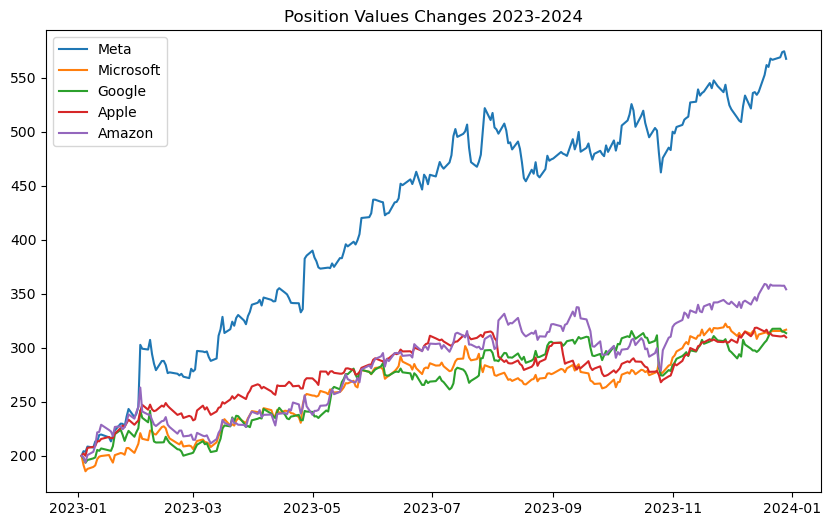

In [240]:
plt.figure(figsize=(10,6))
plt.plot(port_val)
plt.title('Position Values Changes 2023-2024')
plt.legend(['Meta','Microsoft','Google','Apple','Amazon']);

<i>The position gained a lot throughout the year. Among all the stocks, we can see that the ROI on Meta is particularly outstanding compared to the others, which is probably why the portfolio gained so much.<i>

<h3>Checking the total portfolio value gained<h3>

In [244]:
port_val['Total'] = port_val.sum(axis=1)

In [248]:
port_val.tail()

,Meta,Microsoft,Google,Apple,Amazon,Total
Date,,,,,,
2023-12-22,566.602557,315.469883,317.526924,311.317065,357.539032,1868.455462
2023-12-26,568.911342,315.537259,317.594249,310.432669,357.515740,1869.991260
2023-12-27,573.721400,315.040380,315.013431,310.593432,357.352591,1871.721235
2023-12-28,574.507024,316.059412,314.699245,311.284937,357.445829,1873.996447
2023-12-29,567.516473,316.699459,313.487417,309.596451,354.089963,1861.389763


In [250]:
roi = ((port_val['Total'][-1] - port_val['Total'][0]) / port_val['Total'][0]) * 100

roi

/var/folders/0q/ss18s97x26754rd0xvyqqktr0000gn/T/ipykernel_3774/4256518818.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  roi = ((port_val['Total'][-1] - port_val['Total'][0]) / port_val['Total'][0]) * 100


86.13897633507527

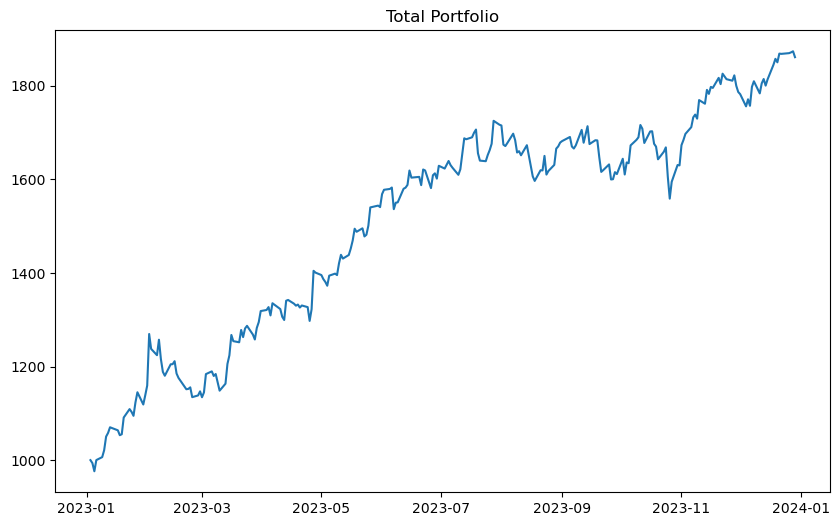

In [261]:
plt.figure(figsize=(10,6))
plt.plot(port_val['Total'])
plt.title('Total Portfolio');

<i>Since portfolio value after one year is 1861 and investment is 1000, cumulative return is 86%.<i>

# Sharpe Ratio 

The Sharpe Ratio is a key metric in portfolio optimization that measures risk-adjusted returns.It equation is 

Sharpe Ratio = (Rp - Rf) / σp

Where:
- Rp = Portfolio return
- Rf = Risk-free rate
- σp = Portfolio standard deviation (risk)

A higher Sharpe Ratio indicates better risk-adjusted performance, meaning the portfolio is generating higher returns per unit of risk. Investors use it to compare different portfolios and select the one that provides the best return relative to its volatility.

<b>Note: The Sharpe ratio is a yearly metric, but I'm working with daily data. To annualize the return, I needed to multiply by  
sqrt{255}<b>

<h3>Checking out the Sharpe Ratio of evenly allocation<h3>

In [289]:
#adding daily return col to calculate sharpe ratio 

#getting daily return on total position : calculation > today's position / yst's position
port_val['Daily Return'] = port_val['Total'].pct_change(1)

port_val.head()

,Meta,Microsoft,Google,Apple,Amazon,Total,Daily Return
Date,,,,,,,
2023-01-03,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,NaN
2023-01-04,204.216801,191.251380,197.666060,202.062853,198.415287,993.612381,-0.006388
2023-01-05,203.527348,185.583096,193.447035,199.920037,193.707768,976.185284,-0.017539
2023-01-06,208.465651,187.770244,196.005377,207.275933,200.605924,1000.123129,0.024522
2023-01-09,207.583808,189.598450,197.531391,208.123443,203.588909,1006.426001,0.006302


In [294]:
#Sharpe Ratio
port_val = port_val.dropna()

sharpe_ratio = ( port_val['Daily Return'].mean() / port_val['Daily Return'].std() ) ** np.sqrt(255)

sharpe_ratio

4.921196998758133e-13

<b><i>A Sharpe Ratio of 5 indicates an excellent investment portfolio. However, in reality, it's very difficult to achieve such a level, and most top investment funds have a Sharpe ratio around 2. Let's explore how this can be achieved and what the optimal allocation might look like.</i></b>

Sharpe ratio values:
<ul>
  <li>< 1: Not good, there may be more efficient investments with better risk-reward profiles</li>
  <li>1 >=: Decent investment</li>
  <li>2 >=: Pretty good</li>
  <li>5 >=: Excellent investment</li>
</ul>


<h1>Monte-Carlo Simulation</h1>

<p>Monte Carlo Simulation is a technique where we run lots of random simulations to see how different factors affect the outcome. It's helpful for portfolio optimization because it lets us try out many allocation combinations to find the best one.<p>

<p>By checking the Sharpe ratio for each combination, we can find the allocation that offers the best return for the risk we're taking. It's a great way to figure out the most efficient portfolio, especially when there’s a lot of uncertainty.<p>

In [312]:
#first need to prepare the df in order to calculate sharpe ratio easily
#will use log return which is commonly used.because they are time-consistent, better normalize extreme price changes

stocks = pd.concat([meta['Close'],microsoft['Close'],google['Close'],apple['Close'],amazon['Close']], axis=1)

log_rt = np.log(stocks/stocks.shift(1))
log_rt = log_rt.dropna()

log_rt.head()

Ticker,META,MSFT,GOOGL,AAPL,AMZN
Date,,,,,
2023-01-04,0.020865,-0.044729,-0.011738,0.010261,-0.007955
2023-01-05,-0.003382,-0.030086,-0.021575,-0.010661,-0.024012
2023-01-06,0.023974,0.011716,0.013138,0.036133,0.034992
2023-01-09,-0.004239,0.009689,0.007755,0.004080,0.014760
2023-01-10,0.026825,0.007588,0.004534,0.004446,0.028327


In [318]:
# # of simulations
num_sim = 25000

#empty array to add the answers 
#to store all the allocations 
all_allo = np.zeros((num_sim,len(stocks.columns)))
#to store expected returns
ret_arr = np.zeros(num_sim)
#to store expected volatitliy
vol_arr = np.zeros(num_sim)
#to store sharpe ratios 
sharpe_arr = np.zeros(num_sim)

In [322]:
#looping for num of simulations and finding the expected return, volatility and sharpe ratio for each simulation

for i in range(num_sim):
    #creating random allocations for each round
    rnd_allo = np.array(np.random.random(5))
    #making sure sum of random allocation is equal to 1. 
    rnd_allo = rnd_allo/np.sum(rnd_allo) 

    #adding each allocation to the empty array 
    all_allo[i,:] = rnd_allo

    #expected return 
    ret_arr[i] = np.sum((log_rt.mean() * rnd_allo) * 252)

    #expected volatility 
    vol_arr[i] = np.sqrt(np.dot(rnd_allo.T, np.dot(log_rt.cov()*252, weights)))

    #Sharpe ratio
    sharpe_arr[i] =  ret_arr[i]/vol_arr[i]

In [328]:
#best sharpe ratio
print('Best Sharpe Ratio =',sharpe_arr.max())

Best Sharpe Ratio = 1.1261466082248681


In [330]:
sharpe_arr.argmax()

22582

In [332]:
#index 22582 has the best sharpe ratio, checking return and volatility based on that sharpe ratio
max_sr_ret = ret_arr[22582]
max_vol_arr = vol_arr[22582]

In [346]:
#allo for best sharpe ratio 
print("Optimal allocations for best sharp ratio is ",all_allo[22582,:] * 100)

Optimal allocations for best sharp ratio is  [82.77542391  6.02651891  4.08276093  2.1186456   4.99665065]


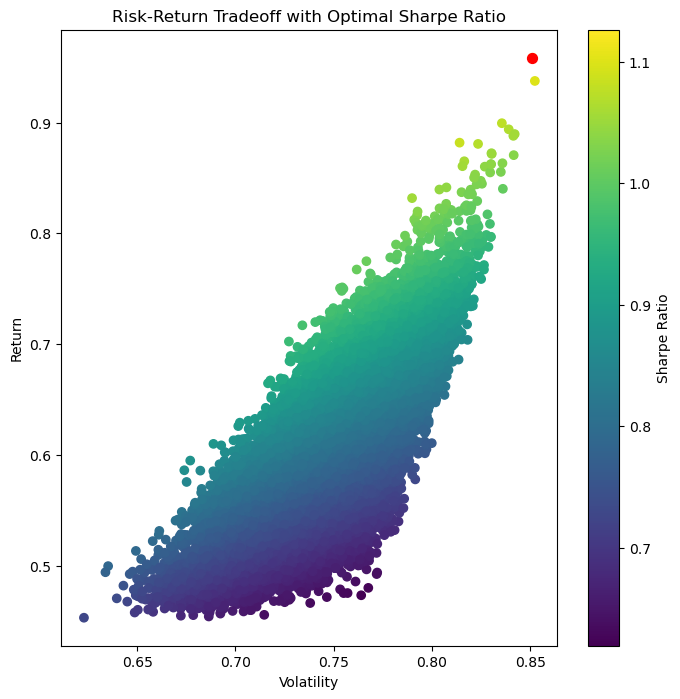

In [342]:
#printing out the best sharpe ratio 
plt.figure(figsize=(8,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.title('Risk-Return Tradeoff with Optimal Sharpe Ratio')
plt.scatter(max_vol_arr, max_sr_ret, c='red', s=50);

In this simulation, we can see that a Sharpe ratio of 1.13 is the best we can get after running 25,000 simulations with random allocations. The portfolio breakdown looks like this:

- 83% in META
- 6% in Microsoft
- 4% in Google
- 2% in Apple
- 5% in Amazon<br>
<b>The scatter plot shows that as risk (volatility) increases, we can get a higher return. Also, it's clear that META is the most volatile stock among all of them.<b>

<br><i>It’s a fun simulation, but there are other methods that might offer better performance when optimizing a portfolio. Still, this gives a decent overview of which allocations work best for our portfolio and whether it’s worth investing. Based on these insights, you can make more efficient investment decisions.<i><br>